In [1]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

@author: Arjun Desai, Stanford University
         (c) Stanford University, 2018
'''

import sys

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 18
params = {'legend.fontsize': fsize*0.8,          
          'axes.labelsize': fsize*0.8,
          'axes.titlesize':fsize,
          'xtick.labelsize':fsize*0.8,
          'ytick.labelsize':fsize*0.8,
          'savefig.dpi': 1000}
sns.set(palette='pastel', rc=params)

import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import analysis_funcs as af
import analysis_utils as autils
import stats
import exp_filepaths as ef

bar_graph_kwargs = {'spacing': 1.0, 'sig_marker_size': 15}

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Define filepaths from central filepath
ARCH_UNET = ef.ARCH_UNET
ARCH_SEGNET = ef.ARCH_SEGNET
ARCH_DEEPLAB = ef.ARCH_DEEPLAB

# loss functions experiments
LOSS_DSC = ef.LOSS_DSC
LOSS_WCE = ef.LOSS_WCE
LOSS_BCE = ef.LOSS_BCE
LOSS_FOCAL = ef.LOSS_FOCAL

# augmentation experiments
AUG_YES = ef.AUG_YES
AUG_NO = ef.AUG_NO

# volumetric architecture experiments
VOLUME_2D = ef.VOLUME_2D
VOLUME_2_5D_3 = ef.NDS_UNET_2_5D_3
VOLUME_2_5D_5 = ef.NDS_UNET_2_5D_5
VOLUME_2_5D_7 = ef.NDS_UNET_2_5D_7
VOLUME_3D_4 = ef.VOLUME_3D_4
VOLUME_3D_8 = ef.VOLUME_3D_8
VOLUME_3D_16 = ef.VOLUME_3D_16
VOLUME_3D_32 = ef.VOLUME_3D_32

## Architecture Experiments

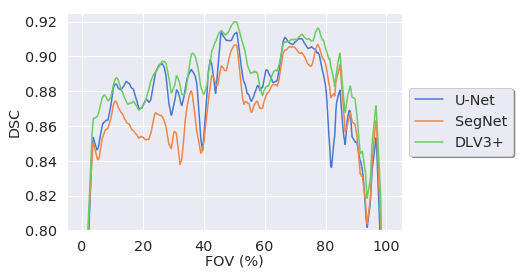

In [3]:
# Architecture result paths
ARCHS = {'filename': 'architecture',
         'keys': ['U-Net', 'SegNet', 'DLV3+'],
         'U-Net': ARCH_UNET, 'SegNet': ARCH_SEGNET, 'DLV3+': ARCH_DEEPLAB}
af.graph_slice_exp(ARCHS, True, title='', show_error=False, ylim=[0.8, 0.925])

In [4]:
pmats_arch = stats.kruskal_dunn_analysis([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB], ARCHS['keys'])

dsc:


,U-Net,SegNet,DLV3+
U-Net,-1.000000,0.812504,0.690707
SegNet,0.812504,-1.000000,0.064193
DLV3+,0.690707,0.064193,-1.000000



voe:


,U-Net,SegNet,DLV3+
U-Net,-1.000000,0.812504,0.690707
SegNet,0.812504,-1.000000,0.064193
DLV3+,0.690707,0.064193,-1.000000



cv:


,U-Net,SegNet,DLV3+
U-Net,-1.0,1.0,1.0
SegNet,1.0,-1.0,1.0
DLV3+,1.0,1.0,-1.0



assd:


,U-Net,SegNet,DLV3+
U-Net,-1.000000,1.000000,0.075149
SegNet,1.000000,-1.000000,0.024831
DLV3+,0.075149,0.024831,-1.000000


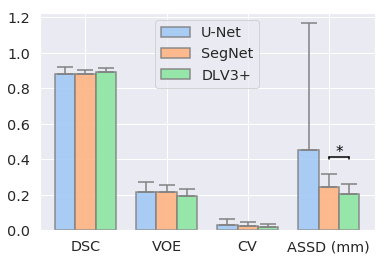

In [5]:
autils.compare_metrics([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB], ARCHS['keys'], p_sig_matrix=pmats_arch, **bar_graph_kwargs)
plt.legend(loc='best')

## Loss Function Experiments

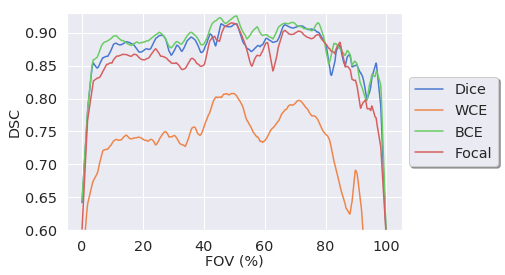

In [6]:
LOSSES = {'filename': 'losses',
          'keys': ['Dice', 'WCE', 'BCE', 'Focal'],
          'Dice': LOSS_DSC, 'WCE': LOSS_WCE, 'BCE': LOSS_BCE, 'Focal': LOSS_FOCAL}
af.graph_slice_exp(LOSSES, True, title='', show_error=False, ylim=[0.60, 0.93])

In [7]:
pmats_loss = stats.kruskal_dunn_analysis([LOSS_DSC, LOSS_WCE, LOSS_BCE, LOSS_FOCAL], LOSSES['keys'])

dsc:


,Dice,WCE,BCE,Focal
Dice,-1.000000e+00,2.678539e-10,1.000000e+00,1.000000e+00
WCE,2.678539e-10,-1.000000e+00,8.269837e-13,9.732385e-07
BCE,1.000000e+00,8.269837e-13,-1.000000e+00,1.845115e-01
Focal,1.000000e+00,9.732385e-07,1.845115e-01,-1.000000e+00



voe:


,Dice,WCE,BCE,Focal
Dice,-1.000000e+00,2.678539e-10,1.000000e+00,1.000000e+00
WCE,2.678539e-10,-1.000000e+00,8.269837e-13,9.732385e-07
BCE,1.000000e+00,8.269837e-13,-1.000000e+00,1.845115e-01
Focal,1.000000e+00,9.732385e-07,1.845115e-01,-1.000000e+00



cv:


,Dice,WCE,BCE,Focal
Dice,-1.000000e+00,3.250497e-10,1.000000e+00,1.000000e+00
WCE,3.250497e-10,-1.000000e+00,3.737045e-09,2.267633e-10
BCE,1.000000e+00,3.737045e-09,-1.000000e+00,1.000000e+00
Focal,1.000000e+00,2.267633e-10,1.000000e+00,-1.000000e+00



assd:


,Dice,WCE,BCE,Focal
Dice,-1.000000e+00,9.882055e-08,9.271659e-01,1.000000
WCE,9.882055e-08,-1.000000e+00,9.348376e-12,0.000008
BCE,9.271659e-01,9.348376e-12,-1.000000e+00,0.157704
Focal,1.000000e+00,7.511818e-06,1.577038e-01,-1.000000


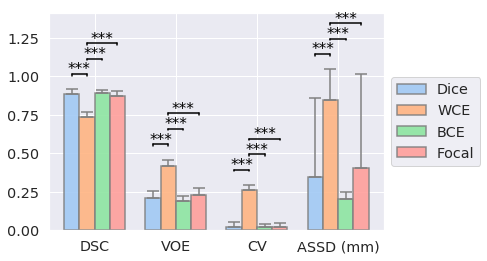

In [8]:
autils.compare_metrics([LOSS_DSC, LOSS_WCE, LOSS_BCE, LOSS_FOCAL], LOSSES['keys'], p_sig_matrix=pmats_loss, **bar_graph_kwargs)
plt.legend(loc='center left', bbox_to_anchor= (1, 0.5))

## Augmentation Experiments

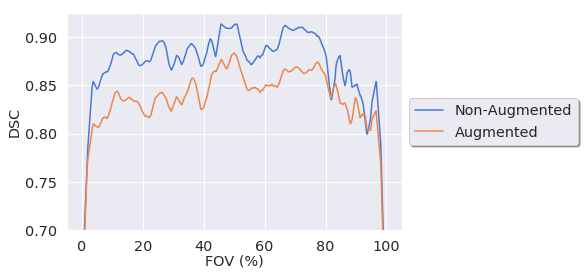

In [9]:
# Augmentation result paths
AUGS = {'filename': 'augment',
        'keys': ['Non-Augmented', 'Augmented'],
        'Augmented': AUG_YES, 'Non-Augmented': AUG_NO}

af.graph_slice_exp(AUGS, title='', show_error=False, ylim=[0.70, 0.925])

In [10]:
pmats_aug = stats.kruskal_dunn_analysis([AUG_NO, AUG_YES], AUGS['keys'])

dsc:


,Non-Augmented,Augmented
Non-Augmented,-1.000000,0.000008
Augmented,0.000008,-1.000000



voe:


,Non-Augmented,Augmented
Non-Augmented,-1.000000,0.000008
Augmented,0.000008,-1.000000



cv:


,Non-Augmented,Augmented
Non-Augmented,-1.000000,0.003017
Augmented,0.003017,-1.000000



assd:


,Non-Augmented,Augmented
Non-Augmented,-1.000000,0.000377
Augmented,0.000377,-1.000000


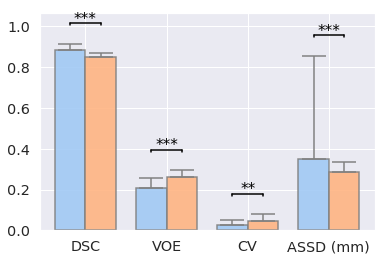

In [11]:
autils.compare_metrics([AUG_NO, AUG_YES], AUGS['keys'], p_sig_matrix=pmats_aug, **bar_graph_kwargs)

## Volume Architecture Experiments

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


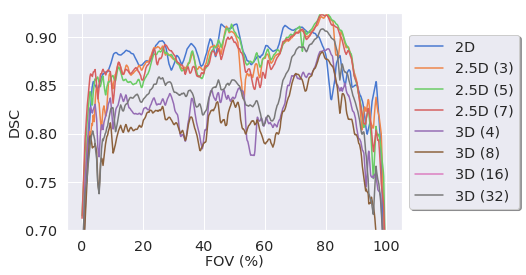

In [12]:
# TODO: inspect training/testing

VOLUMES = {'filename': 'volume',
         'keys': ['2D', '2.5D (3)', '2.5D (5)', '2.5D (7)', '3D (4)', '3D (8)', '3D (16)', '3D (32)'],
         '2D': VOLUME_2D, '2.5D (3)': VOLUME_2_5D_3, '2.5D (5)': VOLUME_2_5D_5, '2.5D (7)': VOLUME_2_5D_7,
          '3D (4)': VOLUME_3D_4, '3D (8)': VOLUME_3D_8, '3D (16)': VOLUME_3D_16, '3D (32)': VOLUME_3D_32}

af.graph_slice_exp(VOLUMES, True, title='', show_error=False, ylim=[0.70, 0.925])

In [13]:
pmats_vol = stats.kruskal_dunn_analysis([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D_4, 
                                         VOLUME_3D_8, VOLUME_3D_16, VOLUME_3D_32], 
                                        VOLUMES['keys'])

dsc:


,2D,2.5D (3),2.5D (5),2.5D (7),3D (4),3D (8),3D (16),3D (32)
2D,-1.000000e+00,1.000000,1.000000e+00,1.000000,0.000006,7.192713e-08,0.000688,0.006156
2.5D (3),1.000000e+00,-1.000000,1.000000e+00,1.000000,0.001024,2.809362e-05,0.045288,0.239778
2.5D (5),1.000000e+00,1.000000,-1.000000e+00,1.000000,0.000024,3.666224e-07,0.002220,0.017350
2.5D (7),1.000000e+00,1.000000,1.000000e+00,-1.000000,0.000163,3.330149e-06,0.010508,0.067764
3D (4),5.760247e-06,0.001024,2.399689e-05,0.000163,-1.000000,1.000000e+00,1.000000,1.000000
3D (8),7.192713e-08,0.000028,3.666224e-07,0.000003,1.000000,-1.000000e+00,1.000000,0.663569
3D (16),6.877551e-04,0.045288,2.219513e-03,0.010508,1.000000,1.000000e+00,-1.000000,1.000000
3D (32),6.155819e-03,0.239778,1.735033e-02,0.067764,1.000000,6.635690e-01,1.000000,-1.000000



voe:


,2D,2.5D (3),2.5D (5),2.5D (7),3D (4),3D (8),3D (16),3D (32)
2D,-1.000000e+00,1.000000,1.000000e+00,1.000000,0.000006,7.192713e-08,0.000688,0.006156
2.5D (3),1.000000e+00,-1.000000,1.000000e+00,1.000000,0.001024,2.809362e-05,0.045288,0.239778
2.5D (5),1.000000e+00,1.000000,-1.000000e+00,1.000000,0.000024,3.666224e-07,0.002220,0.017350
2.5D (7),1.000000e+00,1.000000,1.000000e+00,-1.000000,0.000163,3.330149e-06,0.010508,0.067764
3D (4),5.760247e-06,0.001024,2.399689e-05,0.000163,-1.000000,1.000000e+00,1.000000,1.000000
3D (8),7.192713e-08,0.000028,3.666224e-07,0.000003,1.000000,-1.000000e+00,1.000000,0.663569
3D (16),6.877551e-04,0.045288,2.219513e-03,0.010508,1.000000,1.000000e+00,-1.000000,1.000000
3D (32),6.155819e-03,0.239778,1.735033e-02,0.067764,1.000000,6.635690e-01,1.000000,-1.000000



cv:


,2D,2.5D (3),2.5D (5),2.5D (7),3D (4),3D (8),3D (16),3D (32)
2D,-1.000000,1.0,1.0,1.0,0.82886,1.0,0.997597,1.0
2.5D (3),1.000000,-1.0,1.0,1.0,1.00000,1.0,1.000000,1.0
2.5D (5),1.000000,1.0,-1.0,1.0,1.00000,1.0,1.000000,1.0
2.5D (7),1.000000,1.0,1.0,-1.0,1.00000,1.0,1.000000,1.0
3D (4),0.828860,1.0,1.0,1.0,-1.00000,1.0,1.000000,1.0
3D (8),1.000000,1.0,1.0,1.0,1.00000,-1.0,1.000000,1.0
3D (16),0.997597,1.0,1.0,1.0,1.00000,1.0,-1.000000,1.0
3D (32),1.000000,1.0,1.0,1.0,1.00000,1.0,1.000000,-1.0



assd:


,2D,2.5D (3),2.5D (5),2.5D (7),3D (4),3D (8),3D (16),3D (32)
2D,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000012,0.000291,6.935115e-13,1.830752e-07
2.5D (3),1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.022571,0.192270,9.133503e-08,1.171277e-03
2.5D (5),1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,0.000006,0.000168,2.770183e-13,9.019726e-08
2.5D (7),1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.009411,0.092405,2.130148e-08,4.133756e-04
3D (4),1.199180e-05,2.257065e-02,6.433981e-06,9.410831e-03,-1.000000,1.000000,2.871098e-01,1.000000e+00
3D (8),2.914739e-04,1.922701e-01,1.682987e-04,9.240476e-02,1.000000,-1.000000,3.657491e-02,1.000000e+00
3D (16),6.935115e-13,9.133503e-08,2.770183e-13,2.130148e-08,0.287110,0.036575,-1.000000e+00,1.000000e+00
3D (32),1.830752e-07,1.171277e-03,9.019726e-08,4.133756e-04,1.000000,1.000000,1.000000e+00,-1.000000e+00


In [14]:
# Compare 2.5D networks
matplotlib.rcParams['figure.figsize'] = [15.0, 8.0]
volumes = [VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7]
autils.compare_metrics(volumes, 
                       VOLUMES['keys'], metrics=('dsc', ), p_sig_matrix=[pmats_vol[0]], **bar_graph_kwargs)
autils.compare_metrics(volumes, 
                       VOLUMES['keys'], metrics=('voe', 'cv'), p_sig_matrix=pmats_vol[1:3], **bar_graph_kwargs)
autils.compare_metrics(volumes, 
                       VOLUMES['keys'], metrics=('assd',), p_sig_matrix=[pmats_vol[3]], **bar_graph_kwargs)
plt.legend(loc='lower center', bbox_to_anchor= (0.5, -0.15), ncol=len(VOLUMES['keys']))

IndexError: list index out of range

In [ ]:
# Compare 3D networks
matplotlib.rcParams['figure.figsize'] = [15.0, 8.0]
volumes = [VOLUME_3D_4, VOLUME_3D_8, VOLUME_3D_16, VOLUME_3D_32]
autils.compare_metrics(volumes, 
                       VOLUMES['keys'], metrics=('dsc', ), p_sig_matrix=[pmats_vol[0]], **bar_graph_kwargs)
autils.compare_metrics(volumes, 
                       VOLUMES['keys'], metrics=('voe', 'cv'), p_sig_matrix=pmats_vol[1:3], **bar_graph_kwargs)
autils.compare_metrics(volumes, 
                       VOLUMES['keys'], metrics=('assd',), p_sig_matrix=[pmats_vol[3]], **bar_graph_kwargs)
plt.legend(loc='lower center', bbox_to_anchor= (0.5, -0.15), ncol=len(VOLUMES['keys']))

In [ ]:
matplotlib.rcParams['figure.figsize'] = [15.0, 8.0]
autils.compare_metrics([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D_4, VOLUME_3D_8, VOLUME_3D_16, VOLUME_3D_32], 
                       VOLUMES['keys'], metrics=('dsc', ), p_sig_matrix=[pmats_vol[0]], **bar_graph_kwargs)
autils.compare_metrics([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D_4, VOLUME_3D_8, VOLUME_3D_16, VOLUME_3D_32], 
                       VOLUMES['keys'], metrics=('voe', 'cv'), p_sig_matrix=pmats_vol[1:3], **bar_graph_kwargs)
autils.compare_metrics([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D_4, VOLUME_3D_8, VOLUME_3D_16, VOLUME_3D_32], 
                       VOLUMES['keys'], metrics=('assd',), p_sig_matrix=[pmats_vol[3]], **bar_graph_kwargs)
plt.legend(loc='lower center', bbox_to_anchor= (0.5, -0.15), ncol=len(VOLUMES['keys']))

In [ ]:
# print metrics summary
af.print_metrics_summary([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB])
af.print_metrics_summary([LOSS_DSC, LOSS_BCE, LOSS_WCE, LOSS_FOCAL])
af.print_metrics_summary([AUG_NO, AUG_YES])
af.print_metrics_summary([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D_4, VOLUME_3D_8, VOLUME_3D_16, VOLUME_3D_32])